<a href="https://colab.research.google.com/github/dbace23/hacktiv8/blob/main/h8dsft_P0W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perkenalan
Dataset yang digunakan menampilkan data terkait pokemon. Dimana tujuan ini adalah untuk mencari tahu 
1. overall best pokemon terkuat berdasarkan atribut hp, attack, defense, speed dengan mengkategorikan jumlah pokemon di category high, mid, low
*   ini dilakukan dengan menampilkan atribut nilai hp, atack, defense, speed
*   menambah segmen bin untuk setiap atribut 
*  mendapatkan nilai rata-rata
2. melihat generasi terkuat
3. melihat type 1 terkuat dalam generasi terkuat
4. melihat berapa banyak yang lengedary diantara type 1 terkuat dalam generasi terkuat


---


Dengan ini, pemain game pokemon dapat memilih dan mengetahui pokemon terkuat dan juga mengetahui generasi dan type terkuat dan pada akhirnya pokemon game yang mana yang perlu dimainkan sesuai dengan generasinya.

# Import Kaggle API

In [85]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download abcsds/pokemon -f Pokemon.csv

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


# import libraries needed
impor pandas dan numpy set as pd & np

In [86]:
import numpy as np
import pandas as pd

# Data Loading

In [87]:
#define dataset as df
df = pd.read_csv("Pokemon.csv")

#cek data bisa terlihat
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [88]:
#periksa sederhana
df.info()
#terdapat beberapa object perlu diconvert ke type {Name,Type  1,Type 2}
#terdapat null objects di Type 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


# Data Cleaning

In [89]:
#make copy untuk data column yang diperlukan tanpa mengapus kolom utama
selected_columns = df[["Name","HP","Attack","Defense", "Speed","Type 1", "Generation","Legendary"]]
filtered_df=selected_columns.copy()
#check jika sudah benar dan tercopy datanya
filtered_df.head()


,Name,HP,Attack,Defense,Speed,Type 1,Generation,Legendary
0,Bulbasaur,45,49,49,45,Grass,1,False
1,Ivysaur,60,62,63,60,Grass,1,False
2,Venusaur,80,82,83,80,Grass,1,False
3,VenusaurMega Venusaur,80,100,123,80,Grass,1,False
4,Charmander,39,52,43,65,Fire,1,False


In [90]:
#check untuk blank
filtered_df.isnull().sum()

#jika ada null maka dihilangkan row dan gunakan name baru
#df_new_rows = filtered_df.dropna()

Name          0
HP            0
Attack        0
Defense       0
Speed         0
Type 1        0
Generation    0
Legendary     0
dtype: int64

In [91]:
#ganti object name dan cek dtype
filtered_df["Name"] =filtered_df["Name"].astype("string")
filtered_df["Legendary"] =filtered_df["Legendary"].astype("category")
filtered_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        800 non-null    string  
 1   HP          800 non-null    int64   
 2   Attack      800 non-null    int64   
 3   Defense     800 non-null    int64   
 4   Speed       800 non-null    int64   
 5   Type 1      800 non-null    object  
 6   Generation  800 non-null    int64   
 7   Legendary   800 non-null    category
dtypes: category(1), int64(5), object(1), string(1)
memory usage: 44.8+ KB


In [92]:
#check ada duplicate value di nama, result harusnya true jika false maka di drop
#dengan cara dataset.drop_duplicates
filtered_df["Name"].is_unique

True

# Ekplorasi data

In [93]:
#create new column for hp,attack, defense,speed scores dengan membagi ke 10 bins dan assign value berdasarkan category, dimana semakin besar angkanya semakin bagus
#dibuat 10 category bin agar mendapat lebih rinci
filtered_df["HP_score"] = pd.qcut(filtered_df["HP"], 10, ["1","2","3","4","5","6","7","8","9","10"])
filtered_df["Attack_score"] = pd.qcut(filtered_df["Attack"], 10, ["1","2","3","4","5","6","7","8","9","10"])
filtered_df["Defense_score"] = pd.qcut(filtered_df["Defense"], 10, ["1","2","3","4","5","6","7","8","9","10"])
filtered_df["Speed_score"] = pd.qcut(filtered_df["Speed"], 10, ["1","2","3","4","5","6","7","8","9","10"])

#ubah nilai diatas menjadi integer
filtered_df[["HP_score","Attack_score","Defense_score","Speed_score"]] =filtered_df[["HP_score","Attack_score","Defense_score","Speed_score"]].astype("float32")
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Name           800 non-null    string  
 1   HP             800 non-null    int64   
 2   Attack         800 non-null    int64   
 3   Defense        800 non-null    int64   
 4   Speed          800 non-null    int64   
 5   Type 1         800 non-null    object  
 6   Generation     800 non-null    int64   
 7   Legendary      800 non-null    category
 8   HP_score       800 non-null    float32 
 9   Attack_score   800 non-null    float32 
 10  Defense_score  800 non-null    float32 
 11  Speed_score    800 non-null    float32 
dtypes: category(1), float32(4), int64(5), object(1), string(1)
memory usage: 57.2+ KB
None


In [94]:
#mendapatkan hads score dengan average dari hpscore, attack score, defense score dan speed score, dimana semakin tinggi scorenya maka semakin bagus
filtered_df["HADS_score"] = filtered_df[["Attack_score","Defense_score","HP_score","Speed_score"]].mean(axis=1)
filtered_df 

,Name,HP,Attack,Defense,Speed,Type 1,Generation,Legendary,HP_score,Attack_score,Defense_score,Speed_score,HADS_score
0,Bulbasaur,45,49,49,45,Grass,1,False,2.0,2.0,3.0,3.0,2.50
1,Ivysaur,60,62,63,60,Grass,1,False,4.0,4.0,5.0,5.0,4.50
2,Venusaur,80,82,83,80,Grass,1,False,8.0,6.0,7.0,7.0,7.00
3,VenusaurMega Venusaur,80,100,123,80,Grass,1,False,8.0,8.0,10.0,7.0,8.25
4,Charmander,39,52,43,65,Fire,1,False,1.0,3.0,2.0,5.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,50,100,150,50,Rock,6,True,2.0,8.0,10.0,3.0,5.75
796,DiancieMega Diancie,50,160,110,110,Rock,6,True,2.0,10.0,9.0,10.0,7.75
797,HoopaHoopa Confined,80,110,60,70,Psychic,6,True,8.0,9.0,4.0,6.0,6.75
798,HoopaHoopa Unbound,80,160,60,80,Psychic,6,True,8.0,10.0,4.0,7.0,7.25


In [95]:
#membuat column baru bernama category dengan 3 category top(>8),mid(4-7), bottom(1-3) based on HASD_score
# kondisi yang akan dipenuhi
conditions = [
    (filtered_df["HADS_score"] > 0) & (filtered_df["HADS_score"] < 4.0) ,
    (filtered_df["HADS_score"] > 3.0) & (filtered_df["HADS_score"] < 8.0) ,
    (filtered_df["HADS_score"] > 7.0) 
]
#penamaan untuk setiap kondisi yang dipenuhi
values = ["Low", "Mid", "High"]

#membuat kolum baru menggunakan kondisi dan valus yang dibuat
filtered_df["Category"] = np.select(conditions, values)

#check apabila sudah tercipta kolum baru dan benar
filtered_df["Category"].unique()

array(['Low', 'Mid', 'High'], dtype=object)

In [96]:
#ganti dtype category
filtered_df["Category"] =filtered_df["Category"].astype("string")
filtered_df["Category"].dtype

StringDtype

In [97]:
#drop kolom yang tidak diperlukan
filtered_df.drop(["HP_score","Attack_score","Defense_score","Speed_score"],axis=1, inplace=True)
#rename kolom category ke overall stats
filtered_df.rename(columns = {"Category":"Overall Status"}, inplace = True)
filtered_df

,Name,HP,Attack,Defense,Speed,Type 1,Generation,Legendary,HADS_score,Overall Status
0,Bulbasaur,45,49,49,45,Grass,1,False,2.50,Low
1,Ivysaur,60,62,63,60,Grass,1,False,4.50,Mid
2,Venusaur,80,82,83,80,Grass,1,False,7.00,Mid
3,VenusaurMega Venusaur,80,100,123,80,Grass,1,False,8.25,High
4,Charmander,39,52,43,65,Fire,1,False,2.75,Low
...,...,...,...,...,...,...,...,...,...,...
795,Diancie,50,100,150,50,Rock,6,True,5.75,Mid
796,DiancieMega Diancie,50,160,110,110,Rock,6,True,7.75,Mid
797,HoopaHoopa Confined,80,110,60,70,Psychic,6,True,6.75,Mid
798,HoopaHoopa Unbound,80,160,60,80,Psychic,6,True,7.25,Mid


# Pengambilan Kesimpulan

Pokemon diberikan nilai dengan mengkategorikan setiap atribut hp, attack defense, dan speed. Nilai rata-rata menjadi HADS score, dimana HADS score makin tinggi menunjukkan bahwa pokemon memiliki persentase menang yang lebih tinggi dibanding yang HADS rendah. Dimana ada 3 category High, Middle dan Low. Dalam dunia pokemon, diharapkan untuk mendapatkan pokemon terkuat sehingga berikut wawasan yang dapat diambil.

In [98]:
#overall pokemon terkuat
filtered_df.loc[filtered_df['HADS_score'] == filtered_df["HADS_score"].max()]

,Name,HP,Attack,Defense,Speed,Type 1,Generation,Legendary,HADS_score,Overall Status
163,MewtwoMega Mewtwo X,106,190,100,130,Psychic,1,True,9.75,High
409,SalamenceMega Salamence,95,145,130,120,Dragon,3,False,9.75,High
426,RayquazaMega Rayquaza,105,180,100,115,Dragon,3,True,9.75,High
552,Arceus,120,120,120,120,Normal,4,True,9.75,High


4 Pokemon dengan nilai HADS tertinggi merupakan champion pokemon yang akan memiliki persentase menang lebih tinggi. Walaupun nilai HADS sama. Pemilihan pokemon ini bisa didasarkan pada individu atribut dimana mereka lebih unggul

*   HP tertinggi: Arceus
*   Attack tertinggi:  MewtowMega Mewtwo X
*   Defense tertinggi: SalamenceMega Salamence
*   Speed tercepat: MewtowMega Mewtwo X   


Overall Status
Low     235
Mid     461
High    104
Name: Name, dtype: int64

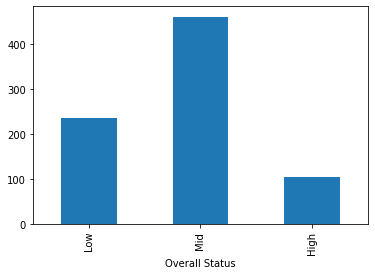

In [99]:
#group by category dan count jumlah dan plot 
%matplotlib inline
filtered_df.groupby("Overall Status", sort=False)["Name"].count().plot(kind="bar")
filtered_df.groupby("Overall Status", sort=False)["Name"].count()

Pokemon terbaik memang sedikit dan dapat dilihat bahwa yang memiliki atribut high paling sedikit, dan dunia pokemon didominasi oleh pokemon middle.

Generation
1    19
2    12
3    21
4    22
5    24
6     6
Name: Name, dtype: int64

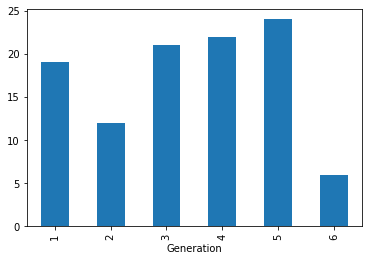

In [100]:
#query category = high dan plot terhadap generasi
filtered_df.query("`Overall Status` == 'High'").groupby("Generation", sort=False)["Name"].count().plot(kind="bar")
filtered_df.query("`Overall Status` == 'High'").groupby("Generation", sort=False)["Name"].count()

Dari tabel berikut, generasi 5 memiliki jumlah pokemon terbanyak dengan attribut high. Ayo kita lihat lebih detil di generasi 5, type 1 apa yang mengdominasi dengan scroll kebawah.

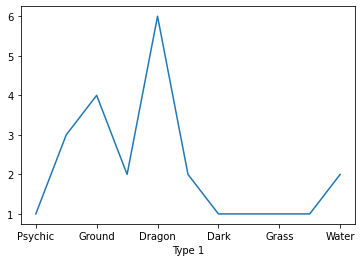

In [101]:
#query category high dan generation 5 dan di group oleh type1 untuk melihat lebih detil di gen 5, type mana yang memiliki overall rating high paling banyak
filtered_df.query("`Overall Status` == 'High' & Generation == '5'").groupby("Type 1", sort=False)["Name"].count().plot()

Dapat dilihat dalam generasi 5, tipe dragon adalah tipe yang jumlahnya paling banyak di category high. Sangat disarankan untuk menangkap tipe dragon.

In [102]:
#query category = high, generation = 5, group by type dan legendary, dan count legendary true false
filtered_df.query("`Overall Status` == 'High' & Generation == '5' ").groupby(["Legendary","Type 1"], sort=False)["Name"].count()

Legendary  Type 1 
True       Bug        0
           Dark       0
           Dragon     5
           Flying     1
           Grass      1
           Ground     2
           Normal     0
           Psychic    1
           Rock       1
           Steel      1
           Water      0
False      Bug        2
           Dark       1
           Dragon     1
           Flying     0
           Grass      0
           Ground     2
           Normal     3
           Psychic    0
           Rock       1
           Steel      0
           Water      2
Name: Name, dtype: int64

Diantara tipe dragon generasi 5 dengan category nilai HADS high ini, 5 diantaranya merupakan pokemon legendaris dan 1 yang bukan. Sehingga kemungkinan untuk menangkapnya menurun.

In [103]:
filtered_df.query("`Overall Status` == 'High' & Generation == '5' & `Type 1` == 'Dragon' ")

,Name,HP,Attack,Defense,Speed,Type 1,Generation,Legendary,HADS_score,Overall Status
673,Haxorus,76,147,90,97,Dragon,5,False,8.50,High
706,Reshiram,100,120,100,90,Dragon,5,True,8.75,High
707,Zekrom,100,150,120,90,Dragon,5,True,9.25,High
710,Kyurem,125,130,90,95,Dragon,5,True,9.00,High
711,KyuremBlack Kyurem,125,170,100,95,Dragon,5,True,9.25,High
712,KyuremWhite Kyurem,125,120,90,95,Dragon,5,True,8.75,High


Berikut pokemon yang disarankan untuk ditangkap untuk generasi 5. Disarankan untuk main pokemon black and white (2010)